# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# loading the dataset
data = pd.read_csv("/content/drive/MyDrive/DSBA/Unsupervised Learning/Project/stock_data.csv")

Mounted at /content/drive


## Data Overview

### First five and last five entries in dataframe

In [3]:
data

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,9.394573e+08,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,1.884615e+08,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,2.578925e+08,22.749999,-0.063096


### Shape of the dataframe

In [4]:
data.shape

(340, 15)

**Observations:**
* 340 entries
* 15 columns

### Make copy of dataframe

In [5]:
df = data.copy()

### Check the data types for the columns in the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**Observations:**
* No missing values in the dataframe
* Four columns contain objects. Two of these columns are categorical.
* Eleven numerical values

### Confirm the absence of missing values

In [7]:
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

**Observations:**
* No missing values

### Check for duplicate entries

In [8]:
df.duplicated().sum()

0

**Observations:**
- There are no duplicate entries in the dataframe.

### View statistical summary of the dataframe

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


**Observations:**
* None of the values apear unreasonable.
* The numerical values will need to be scaled in order to segment the stocks.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [10]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**Questions**:

1. 
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### 1. What does the distribution of stock prices look like?

Mean: 80.86
Median: 59.7


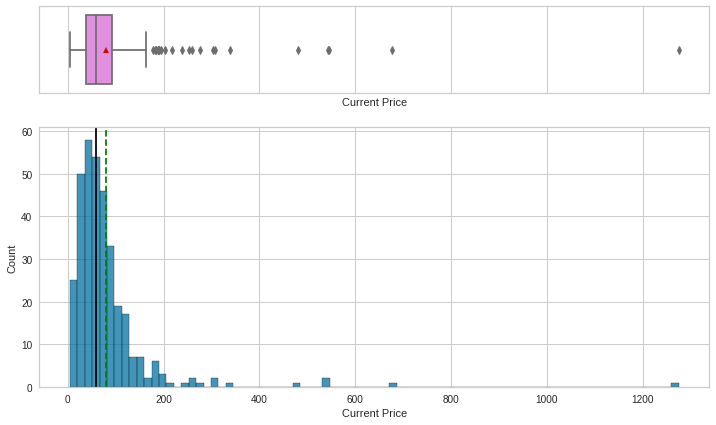

In [11]:
histogram_boxplot(df,"Current Price")

print("Mean:",round(df["Current Price"].mean(),2))
print("Median:",round(df["Current Price"].median(),2))

**Observations:**
* The distribution of stock prices is right skewed.
* There are multiple outliers greater than the maximum.
* Median stock price is $59.70. 

* Mean stock price is $80.86.

### 2. The stocks of which economic sector have seen the maximum price increase on average?

In [12]:
df.groupby(["GICS Sector"])["Price Change"].mean()

GICS Sector
Consumer Discretionary          5.846093
Consumer Staples                8.684750
Energy                        -10.228289
Financials                      3.865406
Health Care                     9.585652
Industrials                     2.833127
Information Technology          7.217476
Materials                       5.589738
Real Estate                     6.205548
Telecommunications Services     6.956980
Utilities                       0.803657
Name: Price Change, dtype: float64

**Observations:**
- The healthcare sector has seen the largest price increase over the past 13 weeks with a rise of $9.59. 

- The consumer staples sector saw the second-largest increase, at $8.68. 

- The energy sector was the only sector to experience a price decrease. $10.22.

### 3. How are the different variables correlated with each other?

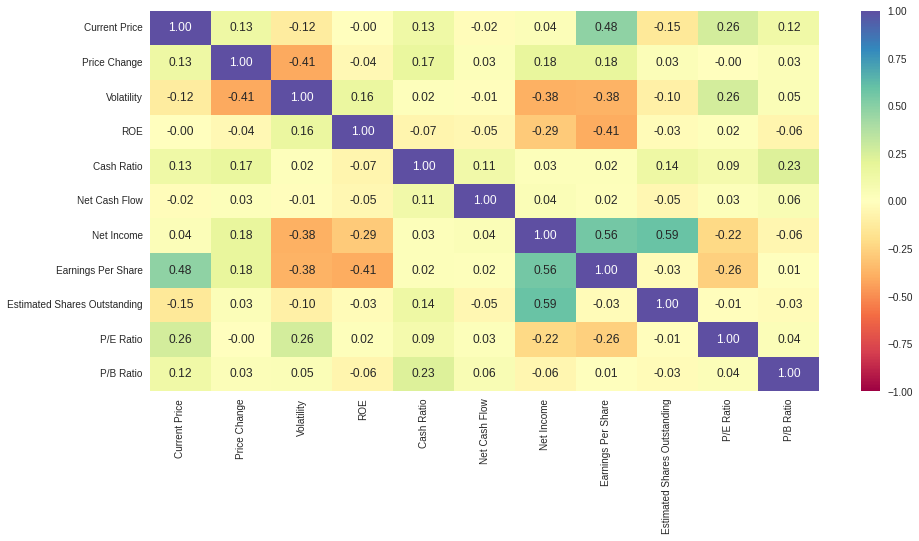

In [13]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### Pairs Plot

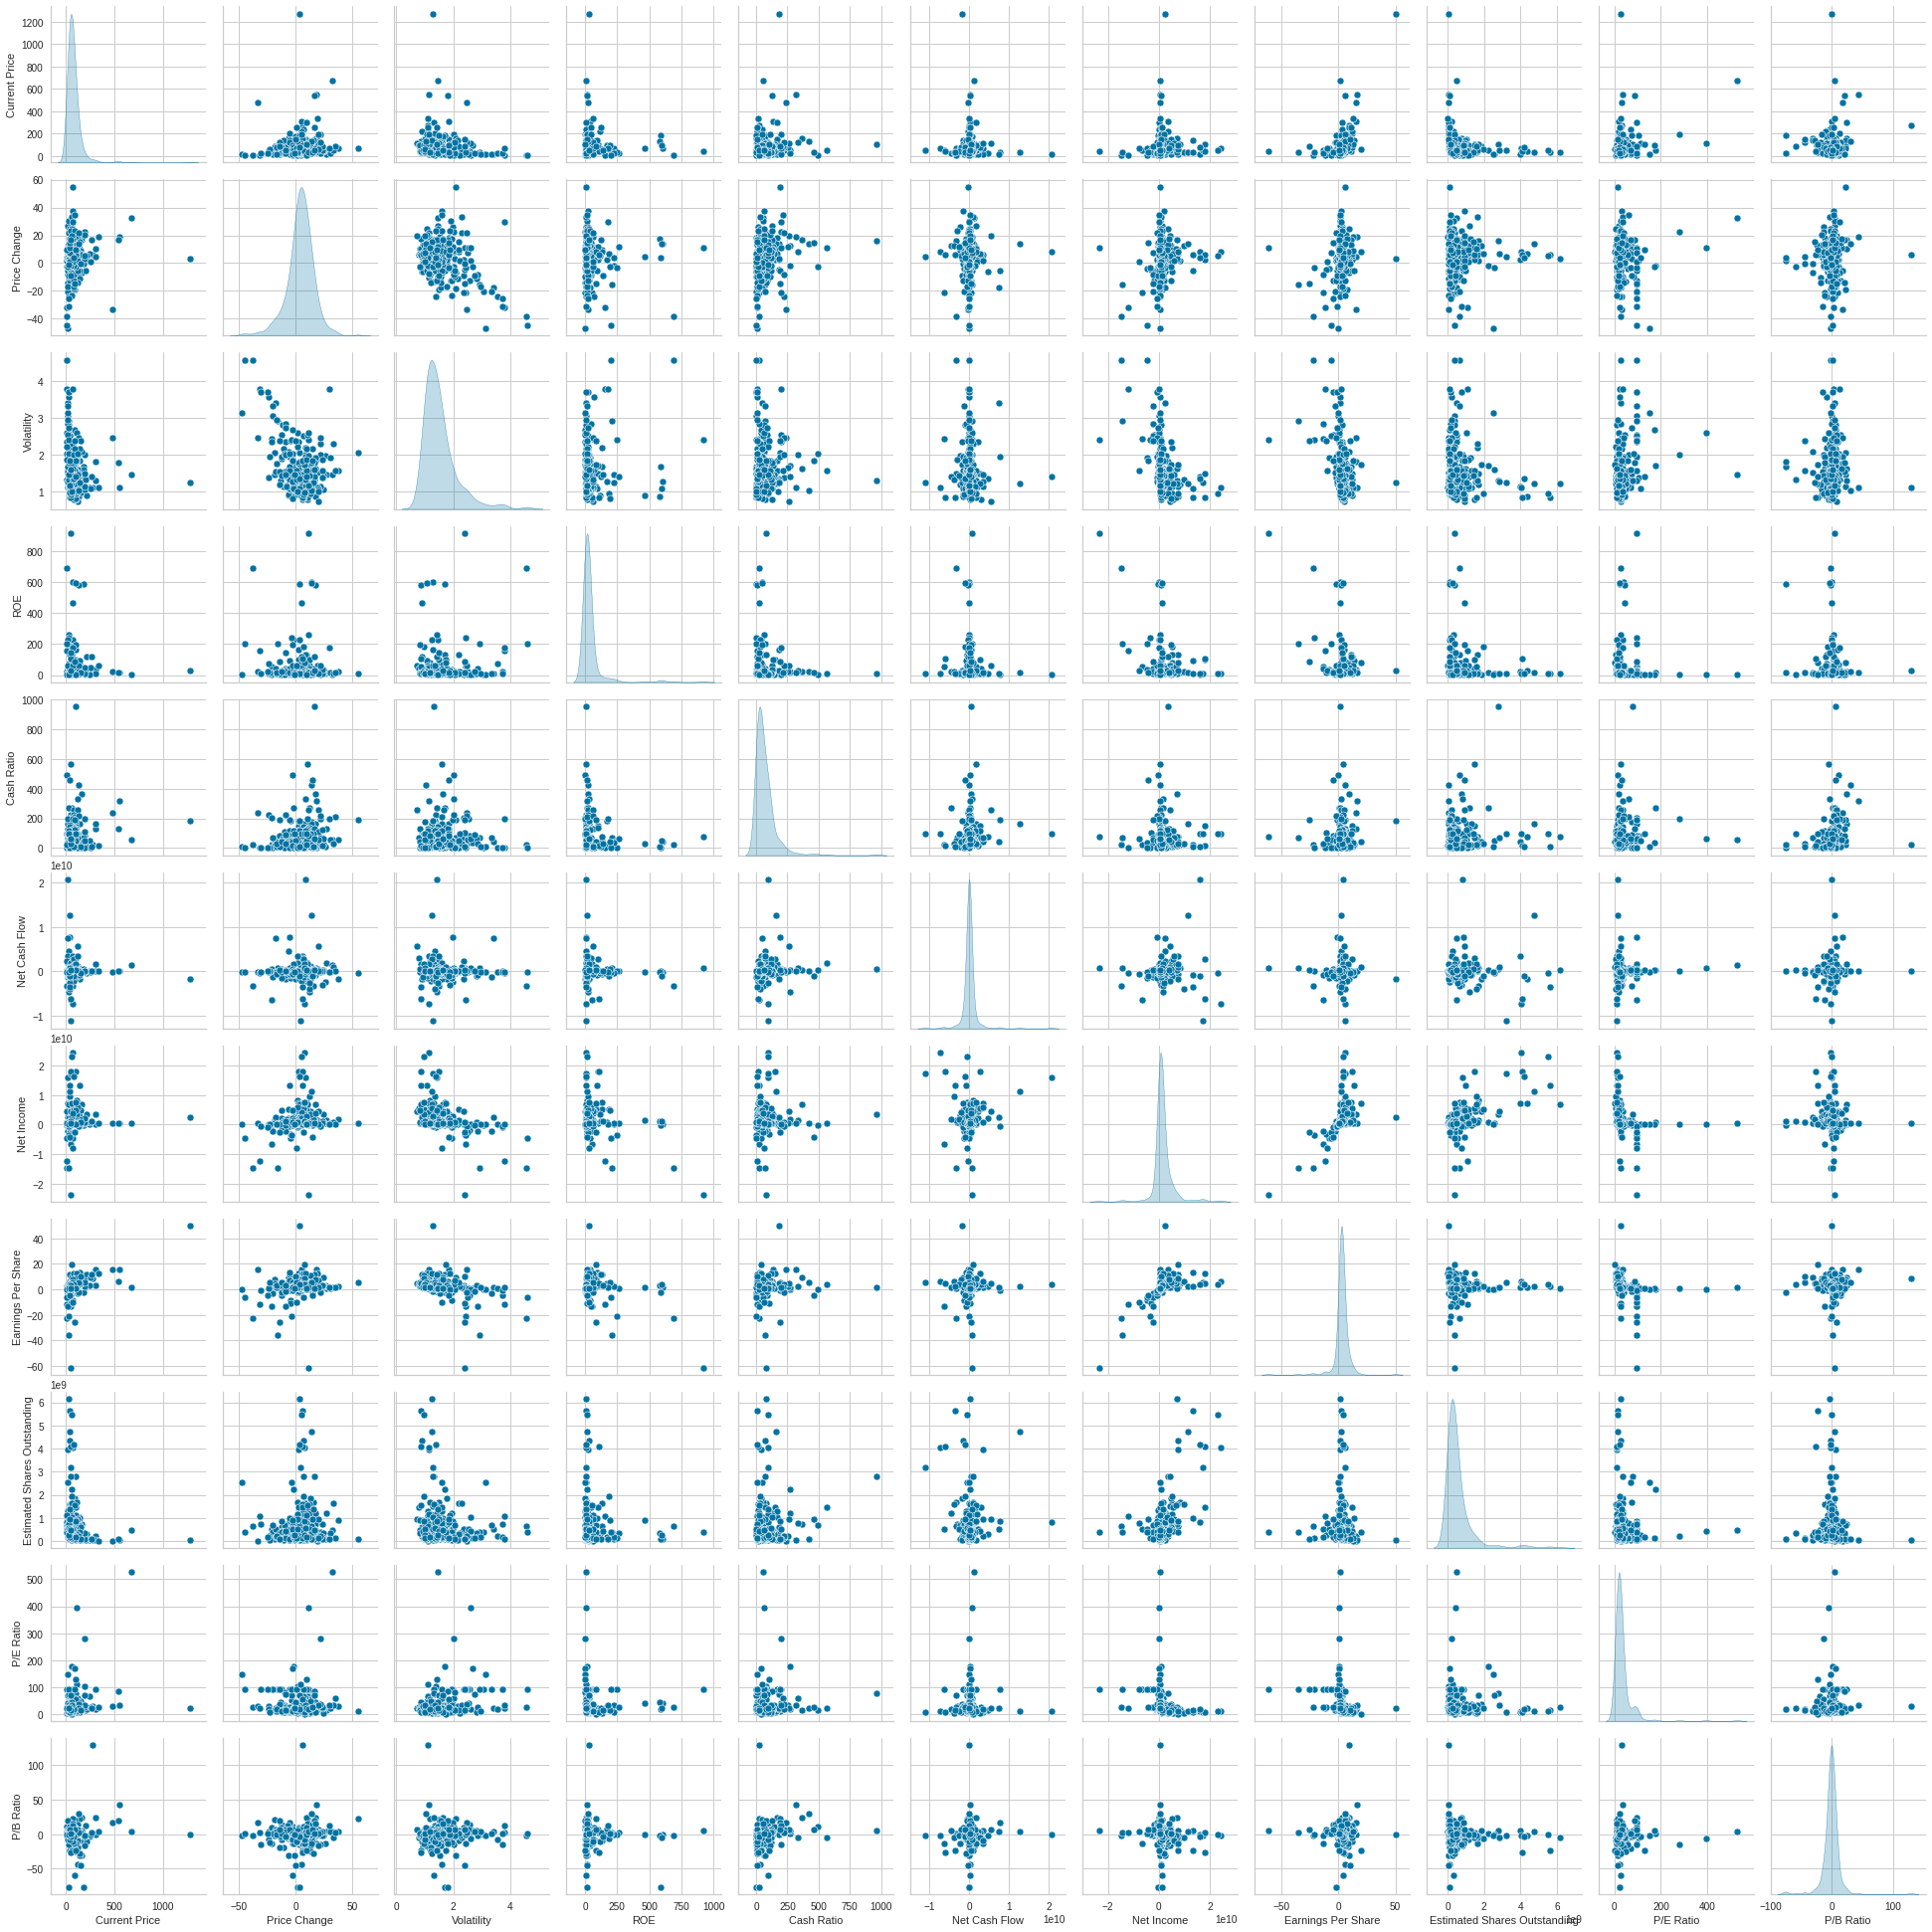

In [14]:
sns.pairplot(data=df[num_cols], diag_kind="kde")
plt.show()

**Observations:**
- None of the variables are strongly correlated. 
- There is a slight positive correlation between Net Income and Estimated Shares Outstanding (0.59) and Net Income and Earnings Per Share (0.56).
- Meanwhile, there is a slight negative correlation between Earning Per Share and ROE(-0.41) and Volatility and Price Change (-0.41).

### 4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

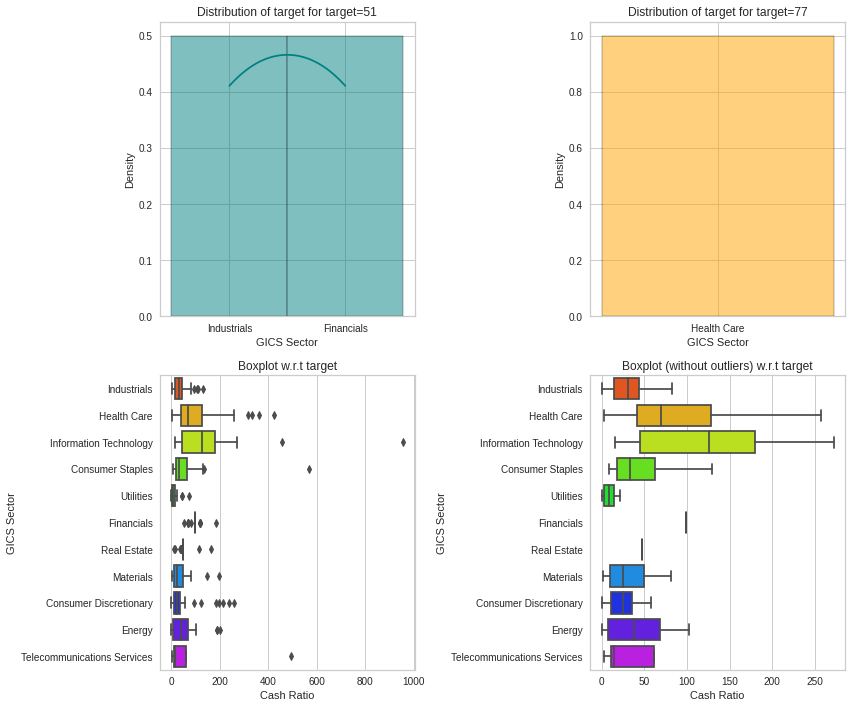

                    GICS Sector  Cash Ratio
6        Information Technology  149.818182
9   Telecommunications Services  117.000000
4                   Health Care  103.775000
3                    Financials   98.591837
1              Consumer Staples   70.947368
2                        Energy   51.133333
8                   Real Estate   50.111111
0        Consumer Discretionary   49.575000
7                     Materials   41.700000
5                   Industrials   36.188679
10                    Utilities   13.625000
Mean: 71.13322824215052
Median: 51.13333333333333


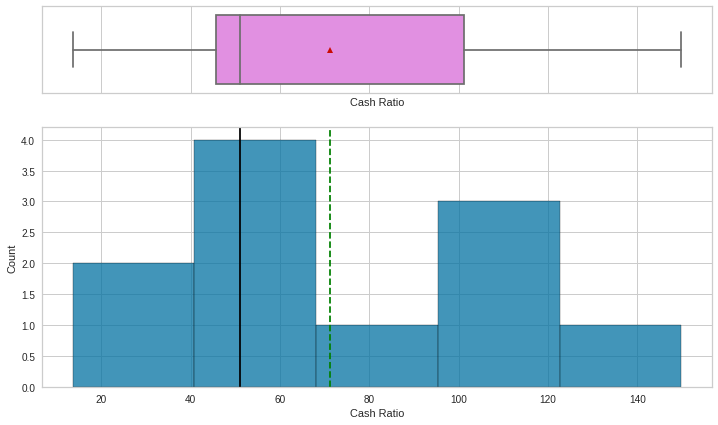

In [15]:
distribution_plot_wrt_target(df, "GICS Sector", "Cash Ratio")

test = df.groupby(["GICS Sector"], as_index = False)["Cash Ratio"].mean().sort_values(by = "Cash Ratio", ascending = False)

histogram_boxplot(test, "Cash Ratio")

print(test)
print("Mean:", test["Cash Ratio"].mean())
print("Median:", test["Cash Ratio"].median())

**Observations:**
- The cash ratios in the given data range from 13.66 in the Utilities sector to 149.82 in the Information Technology sector. 
- The average of all the cash ratios is 71.13, while the median is 51.13.

### 5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

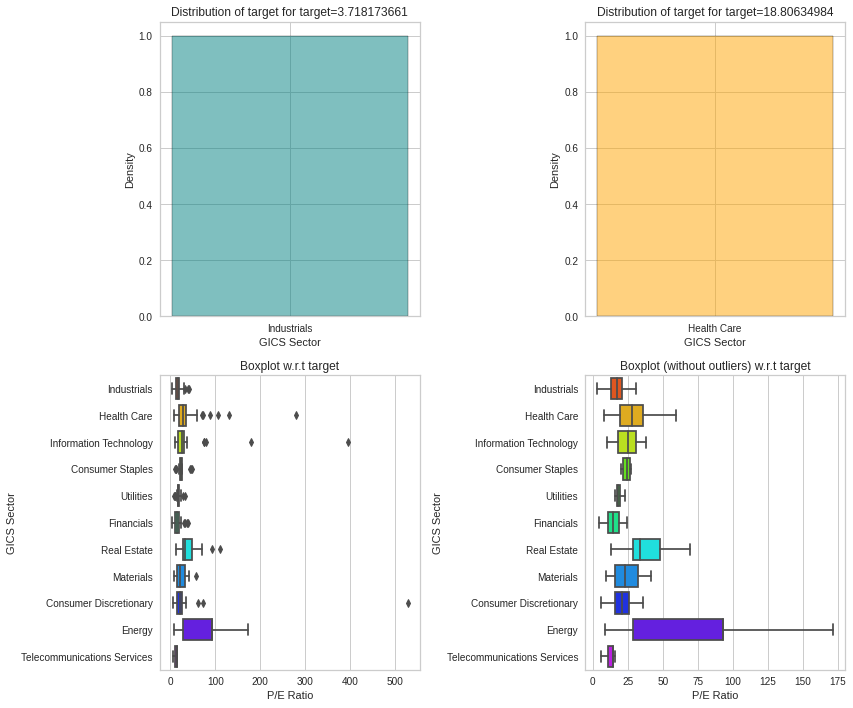

                    GICS Sector  P/E Ratio
2                        Energy  72.897709
6        Information Technology  43.782546
8                   Real Estate  43.065585
4                   Health Care  41.135272
0        Consumer Discretionary  35.211613
1              Consumer Staples  25.521195
7                     Materials  24.585352
10                    Utilities  18.719412
5                   Industrials  18.259380
3                    Financials  16.023151
9   Telecommunications Services  12.222578
Mean: 31.947617473805064
Median: 25.521195269526316


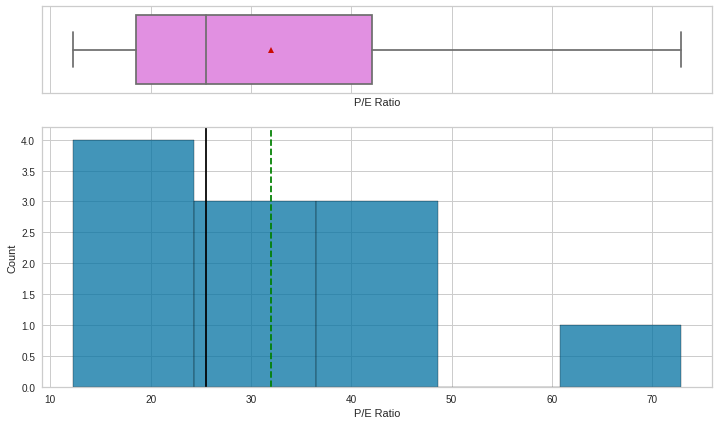

In [16]:
distribution_plot_wrt_target(df, "GICS Sector", "P/E Ratio")

test = df.groupby(["GICS Sector"], as_index = False)["P/E Ratio"].mean().sort_values(by = "P/E Ratio", ascending = False)

histogram_boxplot(test, "P/E Ratio")

print(test)
print("Mean:", test["P/E Ratio"].mean())
print("Median:", test["P/E Ratio"].median())

**Observations:**
- The range of P/E ratios varies from 12.22 (Telecommunications Services sector) to 72.90 (Energy sector). 
- The average P/E ratio across all sectors is 31.95, and the median P/E ratio is 25.52.

## Data Preprocessing

### Scale dataframe

In [17]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)

# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

# Copy the scaled dataframe to be used in K-means and Hierarchical Clustering
scaled_k = subset_scaled_df.copy()
scaled_h = subset_scaled_df.copy()

In [18]:
df_k = df.copy()

## EDA


## K-means Clustering

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1744689145709475
Number of Clusters: 5 	Average Distortion: 2.1265493496386134
Number of Clusters: 6 	Average Distortion: 2.0632482097760407


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Number of Clusters: 7 	Average Distortion: 2.0241357459841063
Number of Clusters: 8 	Average Distortion: 1.9846147988765996


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

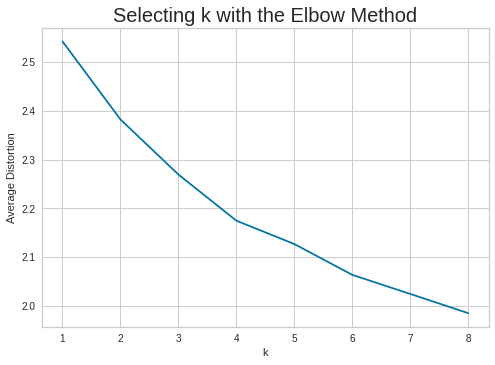

In [19]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_k)
    prediction = model.predict(scaled_k)
    distortion = (
        sum(
            np.min(cdist(scaled_k, model.cluster_centers_, "euclidean"), axis=1)
        )
        / scaled_k.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

**Observations:**
- The graph does not display a distinct elbow, making it challenging to determine the optimal number of clusters.
- The slope of the graph decreases slightly after the 5th centroid, indicating that adding additional clusters beyond this point may not result in significant improvement in clustering quality.

### Check Silhouette Scores

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.4644405674779404


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.4495910932182279
For n_clusters = 5, silhouette score is 0.4200700306792197
For n_clusters = 6, silhouette score is 0.39370682191208695


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.3958796068333948
For n_clusters = 8, silhouette score is 0.390113778407706
For n_clusters = 9, silhouette score is 0.42027459765396213


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


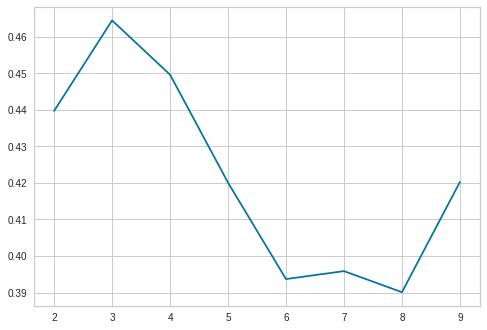

In [20]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((scaled_k))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(scaled_k, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


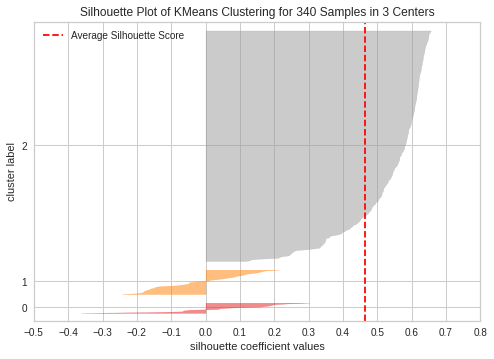

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(scaled_k)
visualizer.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


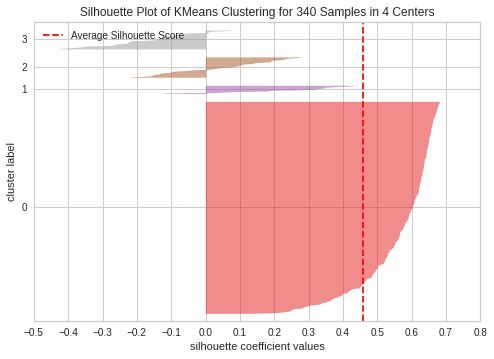

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [22]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(scaled_k)
visualizer.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


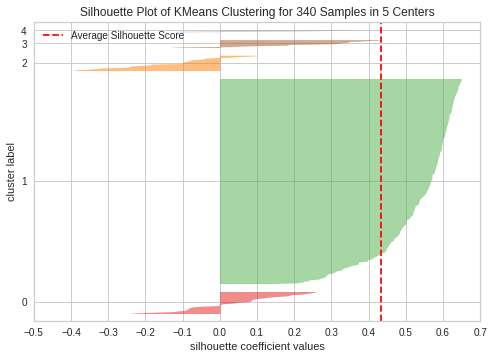

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(scaled_k)
visualizer.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


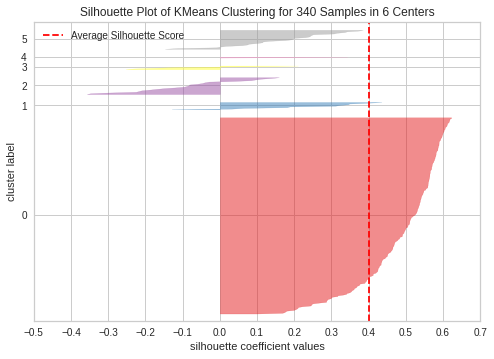

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [24]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(scaled_k)
visualizer.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


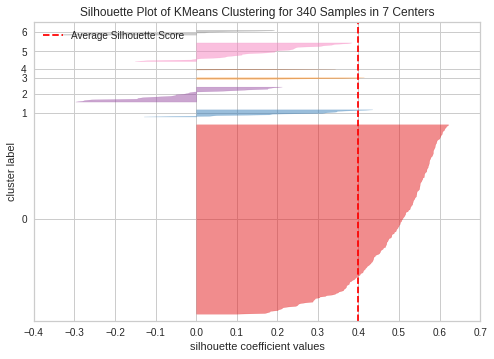

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(scaled_k)
visualizer.show()

**Observations:**
-  In models with 3, 4, 5, 6, and 7 centroids, one group frequently has a disproportionate number of entries compared to other clusters. 
- Using a model with 4 centroids creates a more balanced distribution of entries across all clusters.

### Select Final Model

In [26]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_k)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [27]:
# adding kmeans cluster labels to the original dataframe
df_k["K_means_segments"] = kmeans.labels_

### Cluster Profiling

In [28]:
cluster_profile = df_k.groupby("K_means_segments").mean()

cluster_profile["count_in_each_segment"] = (
    df_k.groupby("K_means_segments")["ROE"].count().values
)

# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25
1,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
2,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
3,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277


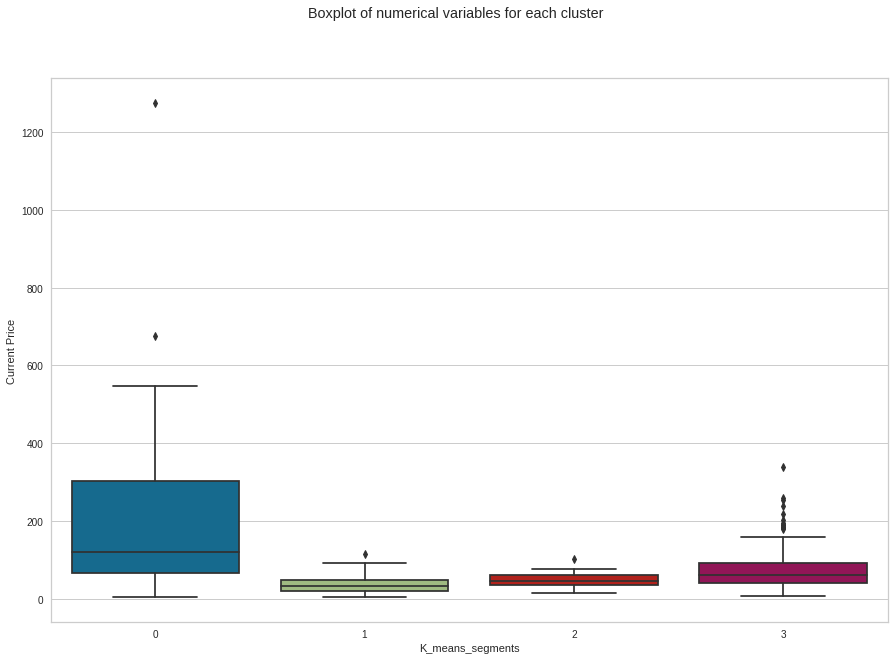

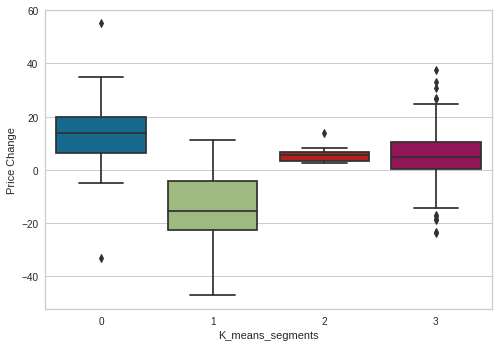

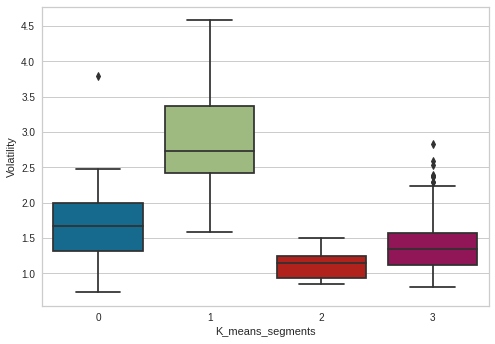

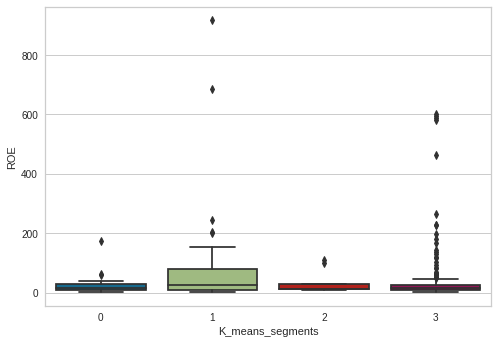

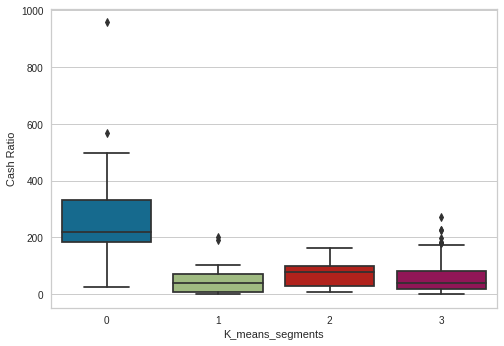

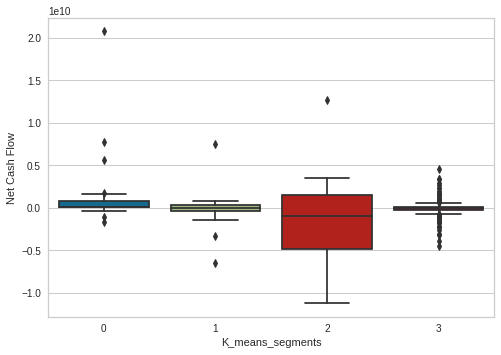

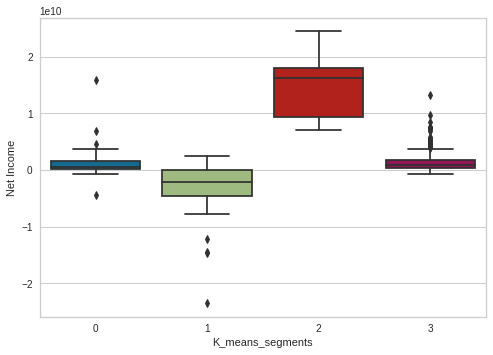

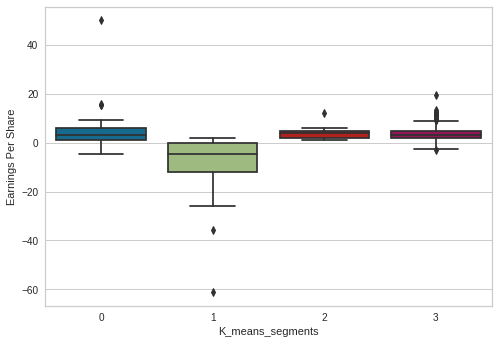

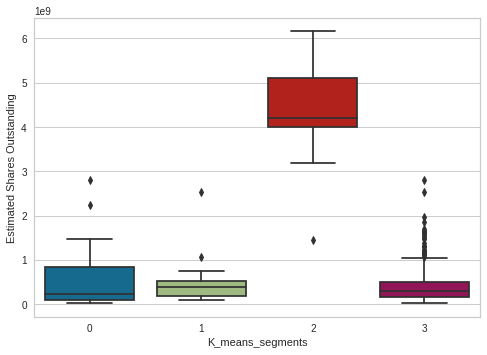

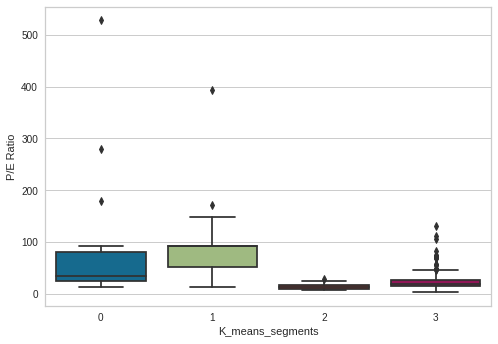

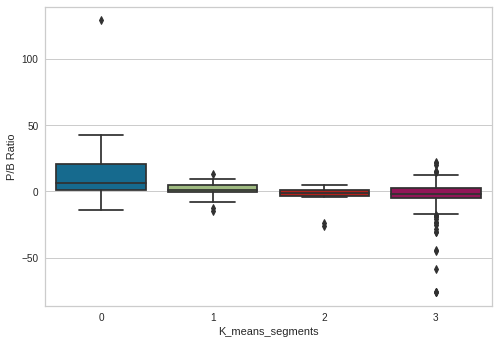

<Figure size 576x396 with 0 Axes>

In [29]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    # plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df_k, x="K_means_segments", y=variable)
    plt.show()

plt.tight_layout(pad=2.0)

### Insights from K-means Clustering


**Cluster 0**
- The cluster of 25 stocks is characterized by a high average price and positive price change, indicating continued growth in value. 
- These stocks also have strong financial metrics, such as the highest cash ratio, net cash flow, and earnings per share. 
- Additionally, the cluster's second highest P/E ratio is a signal that investors hold these stocks in high regard, further reinforcing the notion that they are valued by the market.

**Cluster 1**
- Cluster 1 is made up of 27 stocks and has a lower average price compared to other clusters, as well as a negative price change. This suggests that these stocks may be losing value. 
- The financial metrics for this cluster, such as the lowest net income, lowest cash ratio, negative net cash flow, and high volatility, raise some red flags for investors considering these stocks.
- However, it's important to note that the cluster has the highest return on equity (ROE) which indicates that these stocks might offer attractive returns for investors who are willing to take on more risk.

**Cluster 2**
- This cluster contains 11 stocks.
- This group of stock boasts the highest net income which indicates that the stock in generating money for the company and its investors.
- Its highest estimated shares outstanding suggests that the company has a larger number of shareholders. 
- These stocks have the largest negative net cash flow.

**Cluster 3**
- This cluster represents the majority of the stocks in the data set, with approximately 80% of the stocks, or 277 stocks. 
- These stocks have a relatively high average price and a modest but positive price change, indicating that their values are increasing. 
- Given that this cluster represents the majority of stocks in the data, this growth is seen as a positive signal for the overall market.
- The financial metrics for this cluster are modest but positive, including a positive return on equity (ROE), cash ratio, net income, earnings per share, and P/E ratio. This suggests that these stocks have solid financial performance and are attractive to investors.

## Hierarchical Clustering

### Check the Cophenetic Correlation

In [30]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    print()
    for lm in linkage_methods:
        Z = linkage(scaled_h, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(scaled_h))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm


Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.

Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.

Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic corr

In [31]:
# Find the Cophenetic correlation for the two linkage_methods that only work with the Euclidean distance method
linkage_methods = ["centroid", "ward"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(scaled_h, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(scaled_h))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.


In [32]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9314012446828154, which is obtained with Euclidean distance and centroid linkage.


**Observations:**
- Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.
- Cityblock distance and single linkage result in the second highest cophenetic correlation of 0.933418636652857.
- Chebyshev distance and average linkage yield a cophenetic correlation of 0.9338265528030499 and rank third.

### Checking the Dendrograms

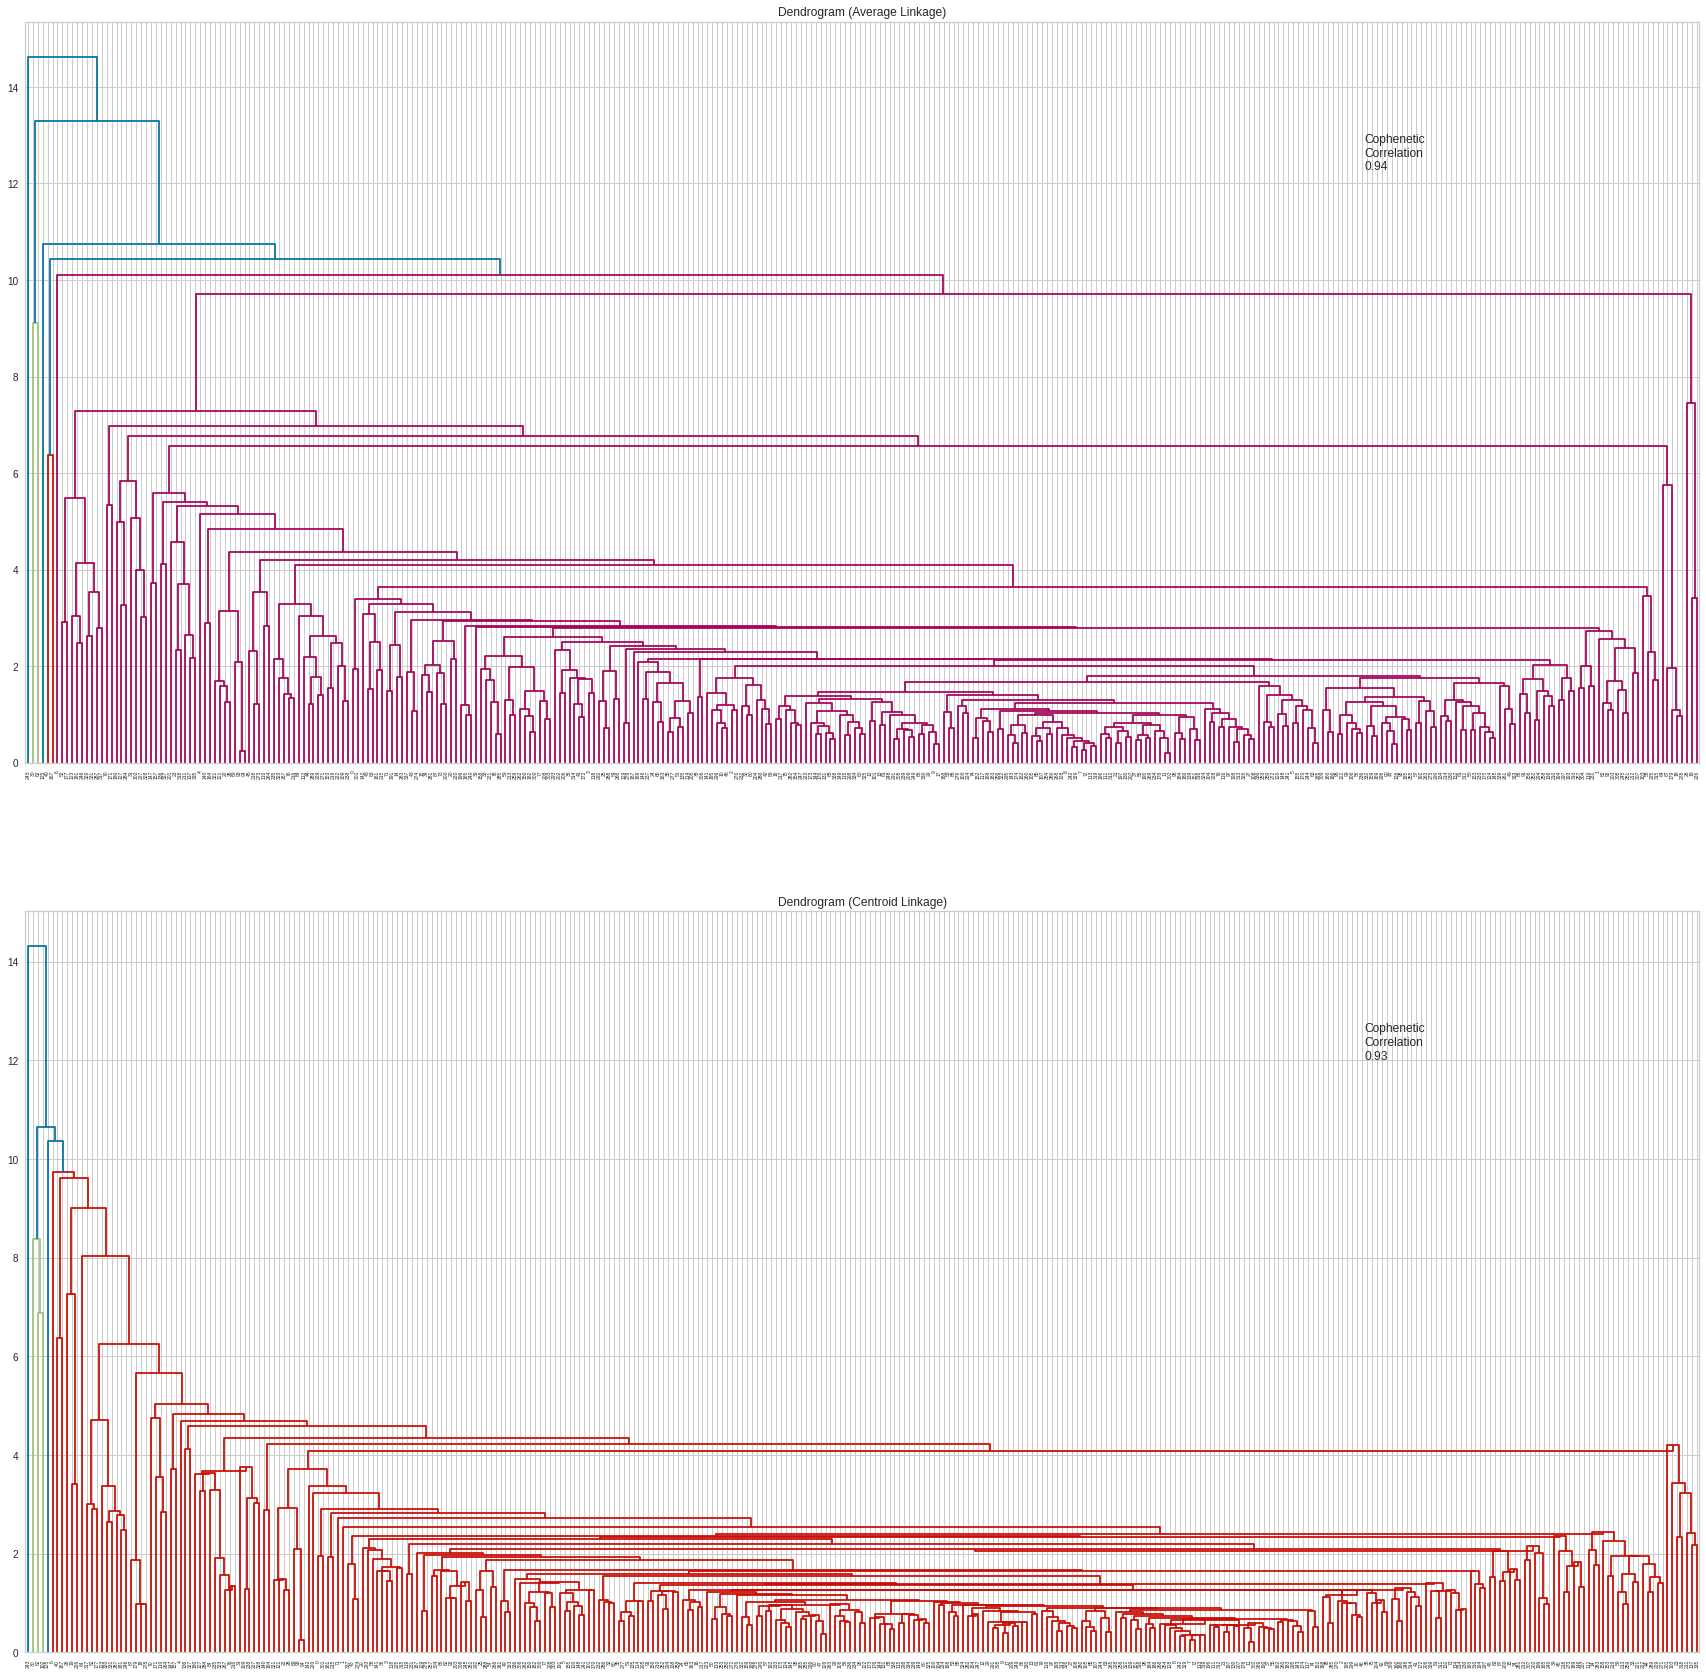

In [33]:
# list of linkage methods
linkage_methods = ["average", "centroid"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(30, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(scaled_h, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(scaled_h))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

Text(0.8, 0.8, 'Cophenetic\nCorrelation\n0.93')

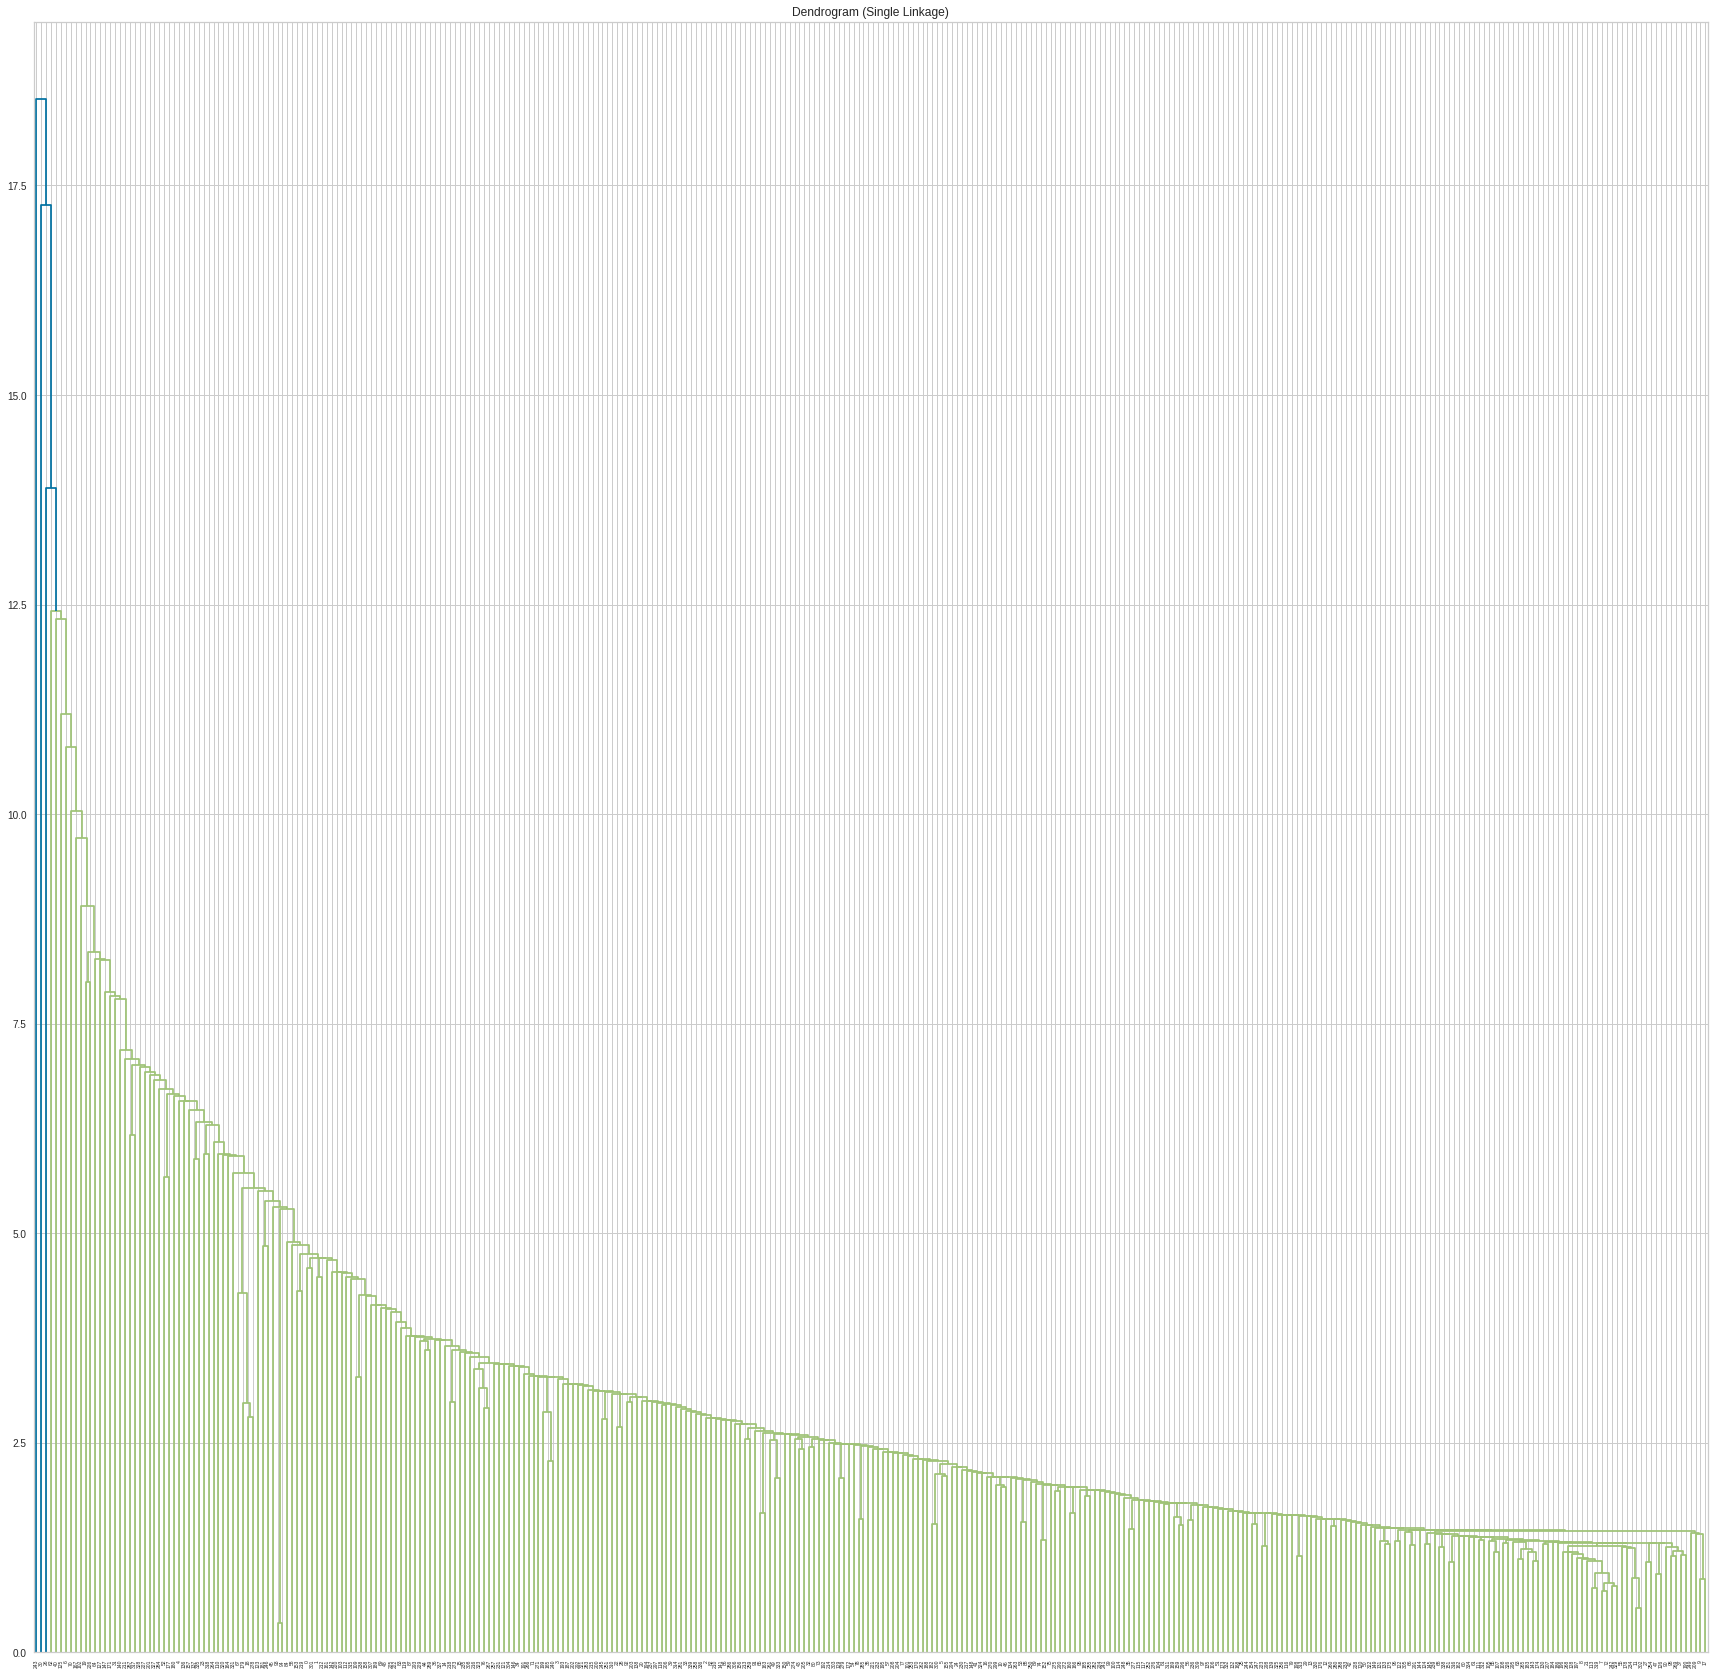

In [34]:
# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, ax = plt.subplots( figsize=(30, 30))

Z = linkage(scaled_h, metric="cityblock", method="single")

dendrogram(Z)
ax.set_title(f"Dendrogram (Single Linkage)")

coph_corr, coph_dist = cophenet(Z, pdist(scaled_h))
axs[i].annotate(
    f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
    (0.80, 0.80),
    xycoords="axes fraction",
)

Text(0.8, 0.8, 'Cophenetic\nCorrelation\n0.93')

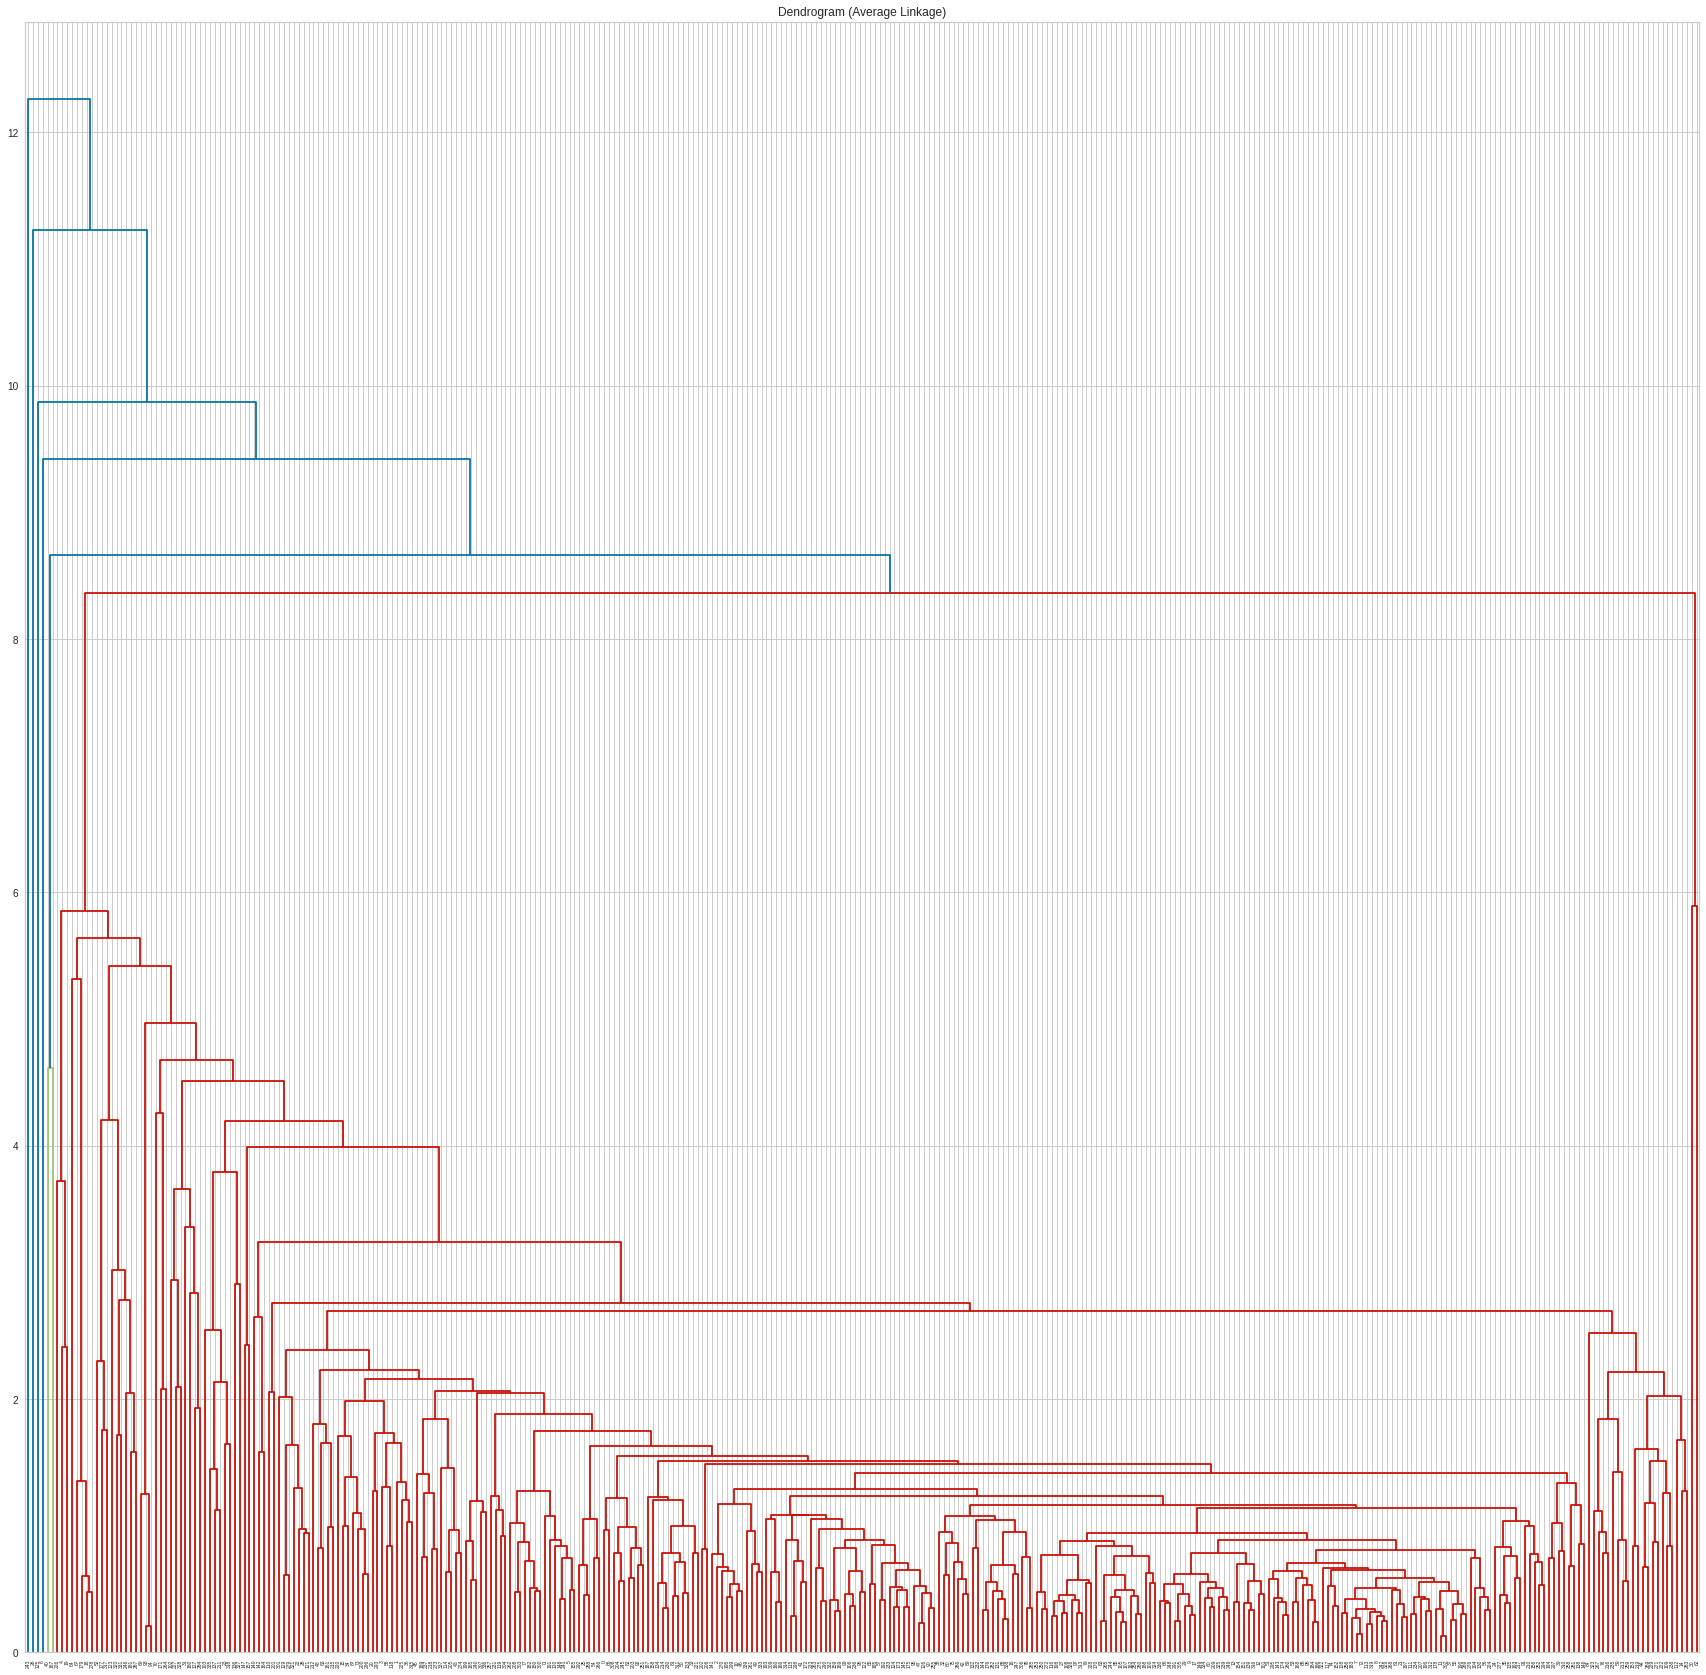

In [35]:
# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, ax = plt.subplots( figsize=(30, 30))

Z = linkage(scaled_h, metric="chebyshev", method="average")

dendrogram(Z)
ax.set_title(f"Dendrogram (Average Linkage)")

coph_corr, coph_dist = cophenet(Z, pdist(scaled_h))
axs[i].annotate(
    f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
    (0.80, 0.80),
    xycoords="axes fraction",
)

**Observations:**
- The dendrograms created using Euclidian distance and average linkage, and Chebyshev distance and average linkage are similar in that they group the data points in the same way using 8 clusters, and both have high cophenetic correlation values (0.94 and 0.93 respectively). 
- However, the optimal number of clusters determined by the longest vertical distance between merged clusters that can still be cut (determined by a horizontal line) differs between the two dendrograms. 
- The dendrogram using Euclidian distance suggests 3 clusters are optimal, while the dendrogram using Chebyshev distance suggests 7 clusters are optimal.
- We will evaluate clusters of 3 and 7.

### Creating Model using sklearn

#### 3 Clusters

In [36]:
scaled_subset_3 = scaled_h.copy()
df3 = df.copy()

In [37]:
HCmodel3 = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel3.fit(scaled_subset_3)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

In [38]:
scaled_subset_3["HC_Clusters 3"] = HCmodel3.labels_
df3["HC_Clusters 3"] = HCmodel3.labels_

#### 7 Clusters

In [39]:
scaled_subset_7 = scaled_h.copy()
df7 = df.copy()

In [40]:
HCmodel7 = AgglomerativeClustering(n_clusters=7, affinity="euclidean", linkage="average")
HCmodel7.fit(scaled_subset_7)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=7)

In [41]:
scaled_subset_7["HC_Clusters 7"] = HCmodel7.labels_
df7["HC_Clusters 7"] = HCmodel7.labels_

### Cluster Profiling

#### 3 Clusters

In [42]:
cluster_profile3 = df3.groupby("HC_Clusters 3").mean()

In [43]:
cluster_profile3["count_in_each_segments 3"] = (
    df3.groupby("HC_Clusters 3")["Price Change"].count().values
)

In [44]:
# let's see the names of the countries in each cluster
for cl in df3["HC_Clusters 3"].unique():
    print("In cluster {}, the following stocks are present:".format(cl))
    print(df3[df3["HC_Clusters 3"] == cl]["Security"].unique())
    print()

In cluster 0, the following stocks are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC Inc.

In [45]:
# let's display cluster profiles
cluster_profile3.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments 3
HC_Clusters 3,,,,,,,,,,,,
0,77.653642,4.184271,1.515129,35.103858,69.798220,68662246.290801,1613508620.178041,2.900905,578930419.447478,32.466828,-1.739711,337
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2


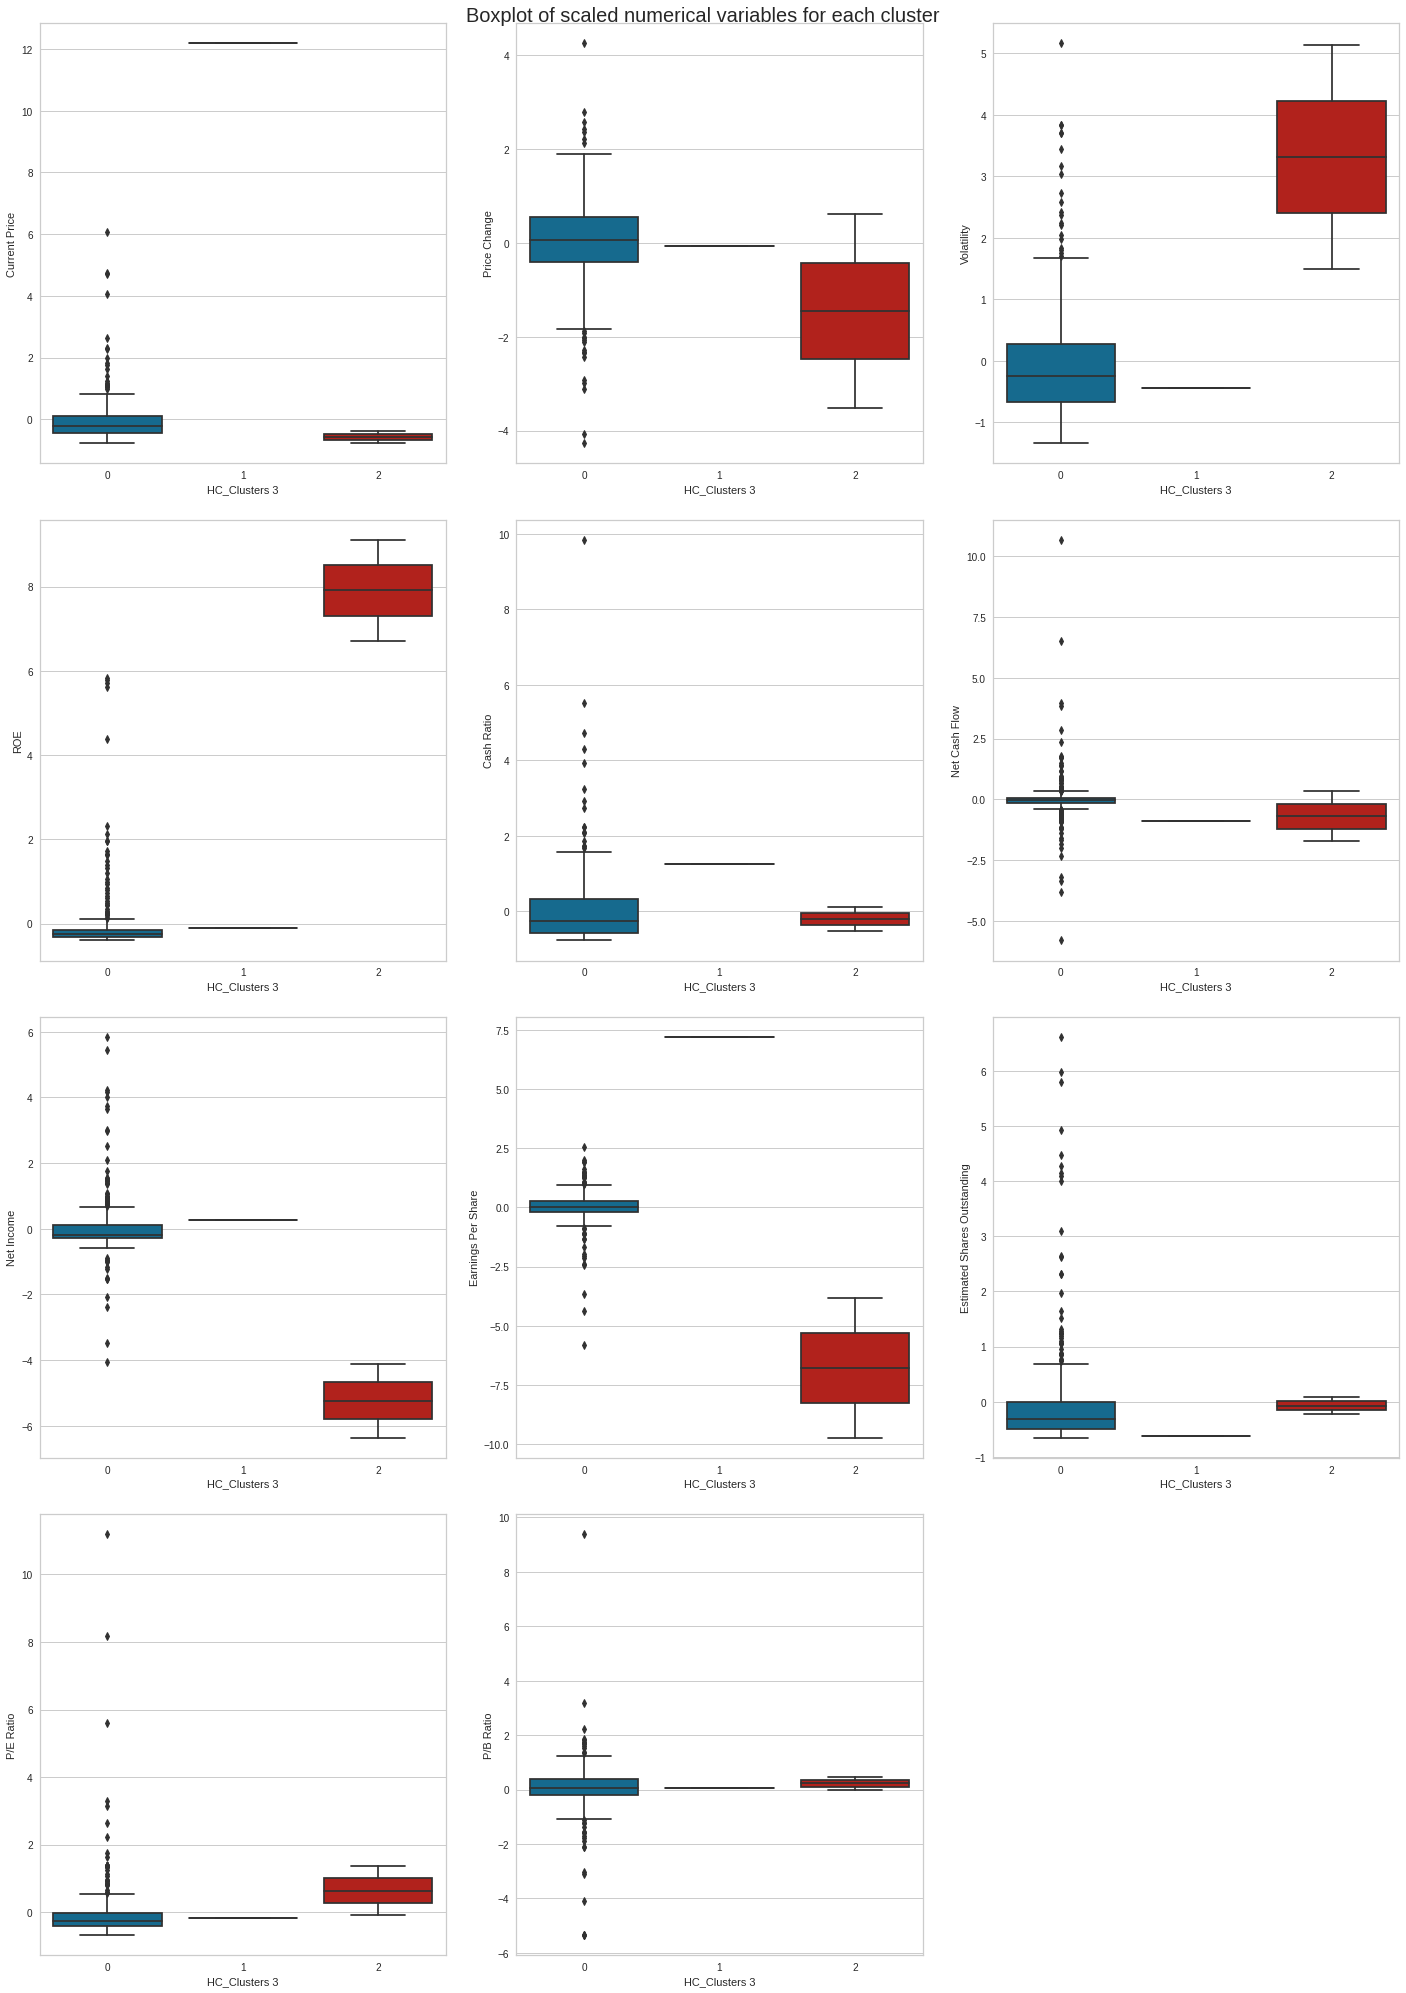

In [46]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=scaled_subset_3, x="HC_Clusters 3", y=variable)

plt.tight_layout(pad=2.0)

#### 7 Clusters

In [47]:
cluster_profile7 = df7.groupby("HC_Clusters 7").mean()

In [48]:
cluster_profile7["count_in_each_segments 7"] = (
    df7.groupby("HC_Clusters 7")["Price Change"].count().values
)

In [49]:
# let's see the names of the countries in each cluster
for cl in df7["HC_Clusters 7"].unique():
    print("In cluster {}, the following stocks are present:".format(cl))
    print(df7[df7["HC_Clusters 7"] == cl]["Security"].unique())
    print()

In cluster 6, the following stocks are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Anadarko Petroleum Corp'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scientifi

In [50]:
# let's display cluster profiles
cluster_profile7.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments 7
HC_Clusters 7,,,,,,,,,,,,
0,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1
6,75.017416,3.937751,1.513415,35.621212,66.545455,-39846757.575758,1549443100.000000,2.904682,562266326.402576,29.091275,-2.146308,330


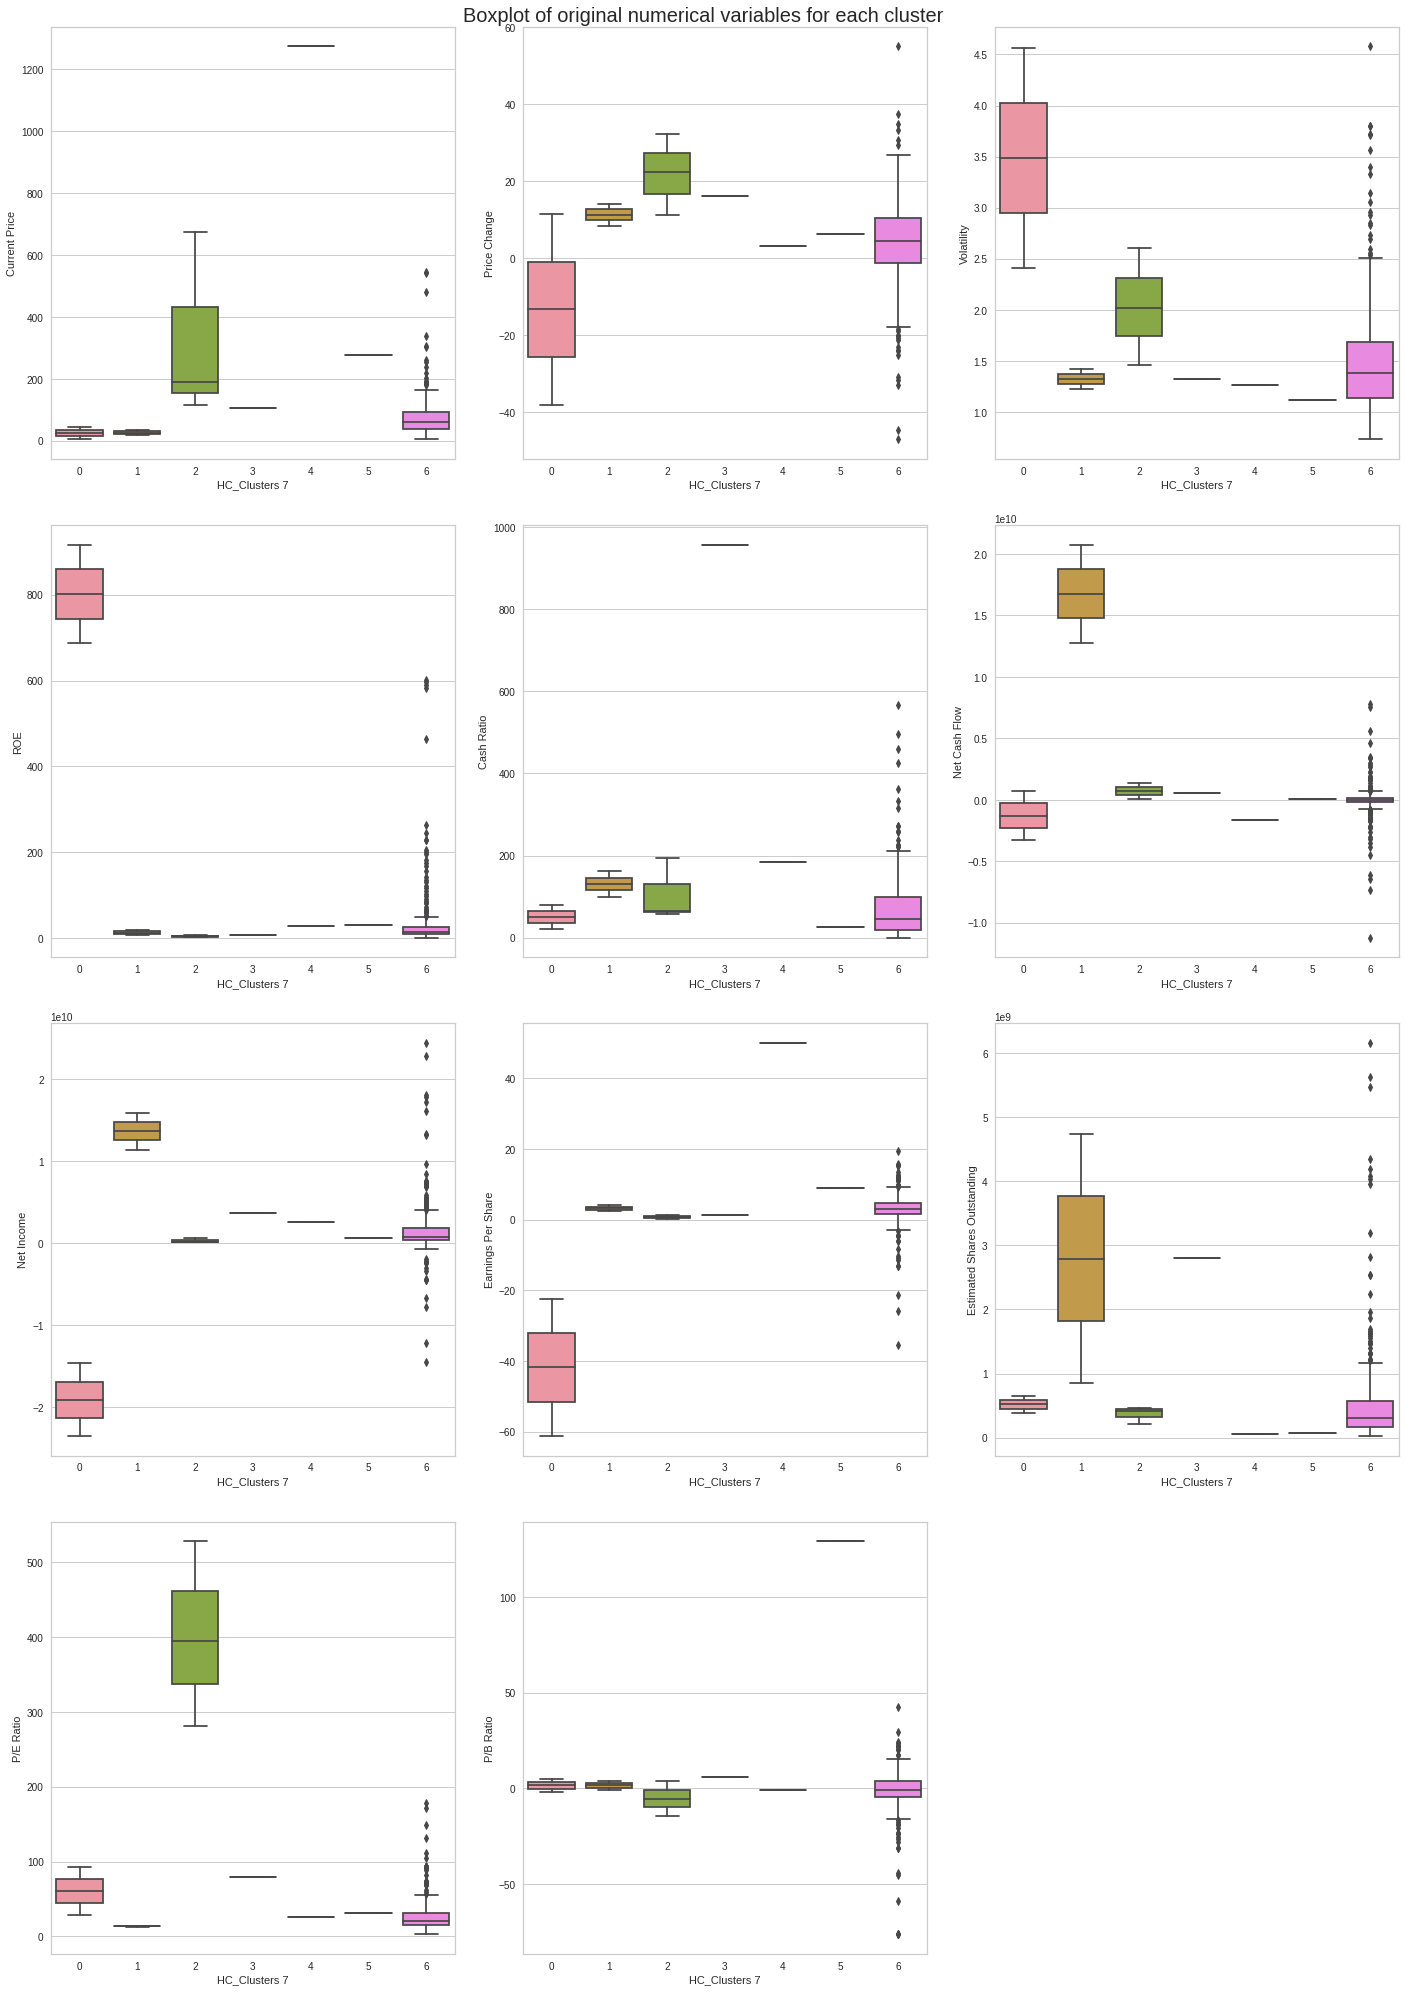

In [51]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df7, x="HC_Clusters 7", y=variable)

plt.tight_layout(pad=2.0)

### Insights from Hierarchical Clustering

- Clustering with both 3 and 7 groups create a single cluster which contains more than 97% of the data points. The remaining groups have one to three data points per group.
- We will use the grouping with 7 clusters because it differentiates the data points slightly better than the grouping with 3 clusters.

**Cluster 0**
- This cluster boasts the highest return on equity,ROE, that is nearly eight times higher than that of the other clusters, making it a potentially strong investment opportunity.
- However, it is important to note that this cluster also experiences the greatest volatility, meaning the stock prices within it fluctuate significantly.
- Additionally, this cluster has the lowest net income and earnings per share compared to the other clusters, which may raise concerns for some potential investors.

**Cluster 1**
- This cluster stands out with its highest cash flow, reflecting the company's robust financial health, capacity to produce cash, and potential for stability and growth. 
- Additionally, it has the highest average net income among the seven clusters - It is the second-highest estimated shares outstanding.

**Cluster 2**
- Cluster 2 comprises stocks that are highly priced.
- The stocks in this group exhibit positive price change, indicating a continuous upward trend in their prices.
- Its high P/E ratio is a reflection of investors' willingness to pay a premium for the stocks, a common occurrence when a company is expected to experience rapid growth in the future.

**Cluster 3**
- This cluster contains only one stock
- The stock boasts the highest cash ratio and the highest estimated shares outstanding.
- The stock has a small, positive net income but a low ROE.

**Cluster 4**
- This cluster contains only one stock.
- This stock has the highest price and earning per share.


**Cluster 5**
- This cluster contains only one stock.
- This stock has a modest net income, third highest earnings per share and modest ROE.

**Cluster 6**
-This group comprises 97% of the stocks in the data frame.
- The group exhibits outliers for several key metrics.
- The group demonstrates modest values for price, net income, return on equity, and cash ratio.
- It has seen positive growth in stock price over time.


- 

## K-Means Clustering vs Hierachical Clustering

### Which clustering technique took less time for execution?

K-Means Clustering completed faster than Hierarchical Clustering, but the runtime difference was not substantial on this particular dataset.

### Which clustering technique gave you more distinct clusters, or are they the same?

Both clustering methods generated a cluster that comprised more than 80% of the data points.

K-Means Clustering generated clear clusters with more balanced distribution of data points. On the other hand, Hierarchical Clustering resulted in six out of seven clusters with only one to three data points each.

### How many observations are there in the similar clusters of both algorithms?

The K-Means Clustering method divided the 340 stocks into four clusters, with the largest cluster having 277 stocks (81% of the data). The remaining three clusters had 11 (3%), 25 (7%), and 27 (8%) stocks, respectively.

The Hierarchical Clustering method separated the 340 stocks into seven groups. The largest cluster had 330 stocks (97% of the dataset), while three clusters had only one stock each. Two clusters each had two stocks and the final cluster had three stocks.

## Actionable Insights and Recommendations

The K-Means Clustering technique was successful in dividing the stock data into distinct clusters with a relatively balanced distribution of data points. This approach effectively grouped the stocks into coherent categories, allowing for a clearer understanding of their characteristics and performance.  

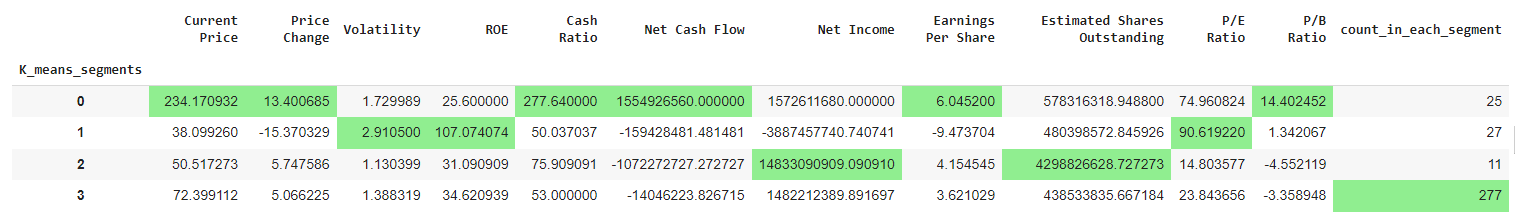

**Cluster 0**
- The cluster of 25 stocks is characterized by a high average price and positive price change, indicating continued growth in value. 
- These stocks also have strong financial metrics, such as the highest cash ratio, net cash flow, and earnings per share. 
- Additionally, the cluster's second highest P/E ratio is a signal that investors hold these stocks in high regard, further reinforcing the notion that they are valued by the market.

**Cluster 1**
- Cluster 1 is made up of 27 stocks and has a lower average price compared to other clusters, as well as a negative price change. This suggests that these stocks may be losing value. 
- The financial metrics for this cluster, such as the lowest net income, lowest cash ratio, negative net cash flow, and high volatility, raise some red flags for investors considering these stocks.
- However, it's important to note that the cluster has the highest return on equity (ROE) which indicates that these stocks might offer attractive returns for investors who are willing to take on more risk.

**Cluster 2**
- This cluster contains 11 stocks.
- This group of stock boasts the highest net income which indicates that the stock in generating money for the company and its investors.
- Its highest estimated shares outstanding suggests that the company has a larger number of shareholders. 
- These stocks have the largest negative net cash flow.

**Cluster 3**
- This cluster represents the majority of the stocks in the data set, with approximately 80% of the stocks, or 277 stocks. 
- These stocks have a relatively high average price and a modest but positive price change, indicating that their values are increasing. 
- Given that this cluster represents the majority of stocks in the data, this growth is seen as a positive signal for the overall market.
- The financial metrics for this cluster are modest but positive, including a positive return on equity (ROE), cash ratio, net income, earnings per share, and P/E ratio. This suggests that these stocks have solid financial performance and are attractive to investors.

## Recommendations

Investors looking to maximize returns and minimize risk should consider a diversified stock portfolio that includes a mix of stocks from both Cluster 0 and Cluster 3.

Stocks in Cluster 0 are currently performing well, with high prices and positive price changes, suggesting they have the potential for immediate gains. The positive financial metrics for these stocks, including cash ratio, earnings per share, and P/E ratio, indicate they are financially sound.

Stocks in Cluster 3, while not experiencing the rapid growth of Cluster 0, still offer a sound investment opportunity. Their prices are modest, but they are growing, and the financial metrics for this group, such as net income, ROE, and cash ratio, are positive. Holding stocks in Cluster 3 can provide long-term stability and protection against the ups and downs of the stock market.

In order to gain a more in-depth understanding of this group of stocks, it may be useful to perform further analysis by segmenting only the stocks contained in Cluster 3. This would provide more detailed insights into this cluster, which represents roughly 80% of the stocks in the data set.